<a href="https://colab.research.google.com/github/jta-aitken/Assignments/blob/main/Regression_Model_Joseph_Aitken.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load Primary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import sklearn

**Understanding the Data**

In [ ]:
# Import the data set.
Data = pd.read_csv ('hate_crimes_reg.csv')

# Check to see if the data has been imported, as expected, by viewing the top 5 rows.
Data.head()

,state,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi,median_household_income
0,Alabama,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839,1.806410,42278
1,Alaska,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740,1.656700,67629
2,Arizona,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928,49254
3,Arkansas,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,0.069061,0.869209,44922
4,California,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,0.255805,2.397986,60487


In [ ]:
# Check the structure is consistent through to the last observation.
Data.tail(1)

,state,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi,median_household_income
50,Wyoming,0.04,0.31,0.918,0.02,0.09,0.423,0.15,0.7,NaN,0.266941,55690


In [ ]:
# Print the coloumn names for future reference.
Data.keys()

Index(['state', 'share_unemployed_seasonal', 'share_population_in_metro_areas',
       'share_population_with_high_school_degree', 'share_non_citizen',
       'share_white_poverty', 'gini_index', 'share_non_white',
       'share_voters_voted_trump', 'hate_crimes_per_100k_splc',
       'avg_hatecrimes_per_100k_fbi', 'median_household_income'],
      dtype='object')

In [ ]:
# Review the type and size of the data set.
print(Data.dtypes)
print(Data.shape)

state                                        object
share_unemployed_seasonal                   float64
share_population_in_metro_areas             float64
share_population_with_high_school_degree    float64
share_non_citizen                           float64
share_white_poverty                         float64
gini_index                                  float64
share_non_white                             float64
share_voters_voted_trump                    float64
hate_crimes_per_100k_splc                   float64
avg_hatecrimes_per_100k_fbi                 float64
median_household_income                       int64
dtype: object
(51, 12)


In [ ]:
# Check to see if there are any 'Not a Number (NaN)' values in the code that may prevent arithmetic.
print(Data.isnull().sum())

state                                       0
share_unemployed_seasonal                   0
share_population_in_metro_areas             0
share_population_with_high_school_degree    0
share_non_citizen                           3
share_white_poverty                         0
gini_index                                  0
share_non_white                             0
share_voters_voted_trump                    0
hate_crimes_per_100k_splc                   4
avg_hatecrimes_per_100k_fbi                 1
median_household_income                     0
dtype: int64


In [ ]:
# The above summary reveals there are 8 instances of NaN values.
# Replace the NaN values with mean values, of their respective column, in above 3 columns using .fillna function.

Data.share_non_citizen.fillna(Data.share_non_citizen.mean(), inplace = True)

Data.hate_crimes_per_100k_splc.fillna(Data.hate_crimes_per_100k_splc.mean(), inplace = True)

Data.avg_hatecrimes_per_100k_fbi.fillna(Data.avg_hatecrimes_per_100k_fbi.mean(), inplace = True)

In [ ]:
# Check again for any NaN values.
print(Data.isnull().sum())

state                                       0
share_unemployed_seasonal                   0
share_population_in_metro_areas             0
share_population_with_high_school_degree    0
share_non_citizen                           0
share_white_poverty                         0
gini_index                                  0
share_non_white                             0
share_voters_voted_trump                    0
hate_crimes_per_100k_splc                   0
avg_hatecrimes_per_100k_fbi                 0
median_household_income                     0
dtype: int64


In [ ]:
# Display key statistics of the data set.
Data.describe()

,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi,median_household_income
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.00000,51.000000,51.000000,51.000000
mean,0.049569,0.750196,0.869118,0.054583,0.091765,0.453765,0.315686,0.49000,0.304093,2.367613,55223.607843
std,0.010698,0.181587,0.034073,0.030130,0.024715,0.020891,0.164915,0.11871,0.242390,1.697016,9208.478170
min,0.028000,0.310000,0.799000,0.010000,0.040000,0.419000,0.060000,0.04000,0.067447,0.266941,35521.000000
25%,0.042000,0.630000,0.840500,0.030000,0.075000,0.440000,0.195000,0.41500,0.147645,1.303706,48657.000000
50%,0.051000,0.790000,0.874000,0.050000,0.090000,0.454000,0.280000,0.49000,0.247009,2.037054,54916.000000
75%,0.057500,0.895000,0.898000,0.080000,0.100000,0.466500,0.420000,0.57500,0.343006,3.168247,60719.000000
max,0.073000,1.000000,0.918000,0.130000,0.170000,0.532000,0.810000,0.70000,1.522302,10.953480,76165.000000


**Visualise the Data**

In [ ]:
# Import the relevant libraries.
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

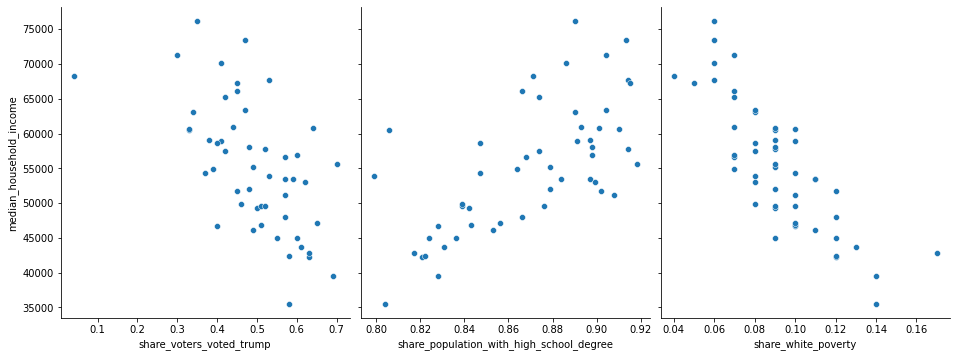

In [ ]:
# Visually compare relationship between 'median_household_income' and other interesting features.
sns.pairplot(Data, 
             x_vars=['share_voters_voted_trump','share_population_with_high_school_degree','share_white_poverty'],
             y_vars= 'median_household_income', 
             height=5 , aspect=0.9)

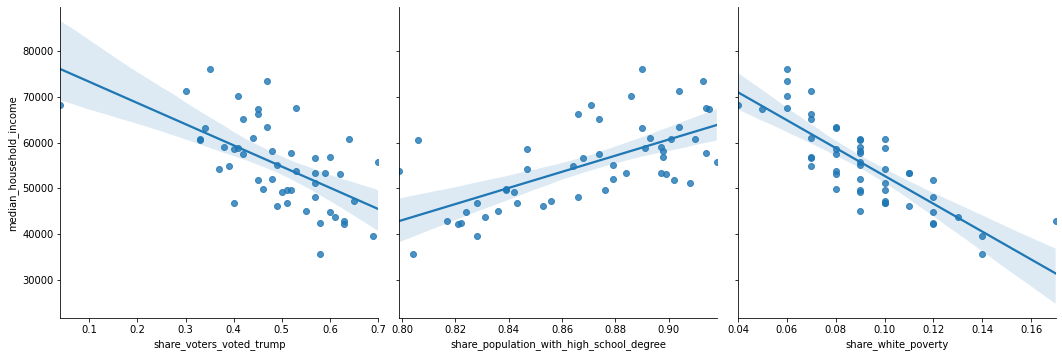

In [ ]:
# Visualise the regression using the kind function.
sns.pairplot(Data, 
             x_vars=['share_voters_voted_trump','share_population_with_high_school_degree','share_white_poverty'],
             y_vars= 'median_household_income', 
             height=5 , aspect=1,
             kind='reg')

**Tailoring the Data**

In [ ]:
# Import the relevant library.
from sklearn.model_selection import train_test_split

In [ ]:
# Remove 'state' column as it will prevent data fitting later i.e. drop the string.
RedactedData = Data.drop(['state'], axis = 1)

# Check revised data.
print(RedactedData.head())
print(RedactedData.shape)

   share_unemployed_seasonal  ...  median_household_income
0                      0.060  ...                    42278
1                      0.064  ...                    67629
2                      0.063  ...                    49254
3                      0.052  ...                    44922
4                      0.059  ...                    60487

[5 rows x 11 columns]
(51, 11)


In [ ]:
# Divide the data into 'Features' and 'Outcome' using .iloc function.

Features = RedactedData.iloc[:,:-1]

Outcome = RedactedData.iloc[:,-1]

In [ ]:
# Check to see if the data set has been divided, as expected.

print(Features.head())

print(Outcome.head())

   share_unemployed_seasonal  ...  avg_hatecrimes_per_100k_fbi
0                      0.060  ...                     1.806410
1                      0.064  ...                     1.656700
2                      0.063  ...                     3.413928
3                      0.052  ...                     0.869209
4                      0.059  ...                     2.397986

[5 rows x 10 columns]
0    42278
1    67629
2    49254
3    44922
4    60487
Name: median_household_income, dtype: int64


In [ ]:
# Perfrom train and test split.
X_train, X_test, y_train, y_test = train_test_split(Features,Outcome, test_size = 0.2, shuffle = False, random_state = 0)

# Check the outcome of the split .
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40, 10), (11, 10), (40,), (11,))

**Linear Regression Model**

In [ ]:
# Import relevant sklearn library.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the model.
LR_Model = LinearRegression()

In [ ]:
# Introduce data to the model.
LR_Model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Make predictions.
Prediction = LR_Model.predict(X_test)

In [ ]:
# Results using Root Mean Squared Error (RMSE).
print("Model used = ",LR_Model)
print("Accuracy score = ",np.sqrt(mean_squared_error(y_test, Prediction)))

Model used =  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Accuracy score =  4422.097939702783


**Feature Selection**

> RFE - 5 Features



In [ ]:
# Import relevant sklearn library.
from sklearn.feature_selection import RFE

In [ ]:
rfe5 = RFE(LR_Model, 5)
rfe5.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=5, step=1, verbose=0)

In [ ]:
# View the top 5 features.
rfe_features_5 = pd.DataFrame ({'Feature':list(X_train.columns),
                              'Rank':rfe5.ranking_})
rfe_features_5.sort_values(by='Rank')

,Feature,Rank
0,share_unemployed_seasonal,1
2,share_population_with_high_school_degree,1
4,share_white_poverty,1
5,gini_index,1
7,share_voters_voted_trump,1
3,share_non_citizen,2
8,hate_crimes_per_100k_splc,3
1,share_population_in_metro_areas,4
6,share_non_white,5
9,avg_hatecrimes_per_100k_fbi,6


In [ ]:
# Transform the training and test data based off the recursive elimination.
X_train_rfe5 = rfe5.transform(X_train)
X_test_rfe5 = rfe5.transform(X_test)

In [ ]:
# Run the model again with amended features.
LR_rfe5_model = LR_Model.fit(X_train_rfe5, y_train)

rfe5_Prediction = LR_rfe5_model.predict(X_test_rfe5)

print("Accuracy score = ",np.sqrt(mean_squared_error(y_test, rfe5_Prediction)))

Accuracy score =  3408.6075286864557




> RFE - 4 Features



In [ ]:
# Perform the same process as above, using 4 features.
rfe4 = RFE(LR_Model, 4)
rfe4.fit(X_train, y_train)
X_train_rfe4 = rfe4.transform(X_train)
X_test_rfe4 = rfe4.transform(X_test)
LR_rfe4_model = LR_Model.fit(X_train_rfe4, y_train)
rfe4_Prediction = LR_rfe4_model.predict(X_test_rfe4)
print("Accuracy score = ",np.sqrt(mean_squared_error(y_test, rfe4_Prediction)))

Accuracy score =  4192.126775548709



> RFE - 6 Features

In [ ]:
# Perform the same process as above, using 6 features.
rfe6 = RFE(LR_Model, 6)
rfe6.fit(X_train, y_train)
X_train_rfe6 = rfe6.transform(X_train)
X_test_rfe6 = rfe6.transform(X_test)
LR_rfe6_model = LR_Model.fit(X_train_rfe6, y_train)
rfe6_Prediction = LR_rfe6_model.predict(X_test_rfe6)
print("Accuracy score = ",np.sqrt(mean_squared_error(y_test, rfe6_Prediction)))

Accuracy score =  3383.722464992088




> RFE - 7 Features



In [ ]:
# Perform the same process as above, using 7 features.
rfe7 = RFE(LR_Model, 7)
rfe7.fit(X_train, y_train)
X_train_rfe7 = rfe7.transform(X_train)
X_test_rfe7 = rfe7.transform(X_test)
LR_rfe7_model = LR_Model.fit(X_train_rfe7, y_train)
rfe7_Prediction = LR_rfe7_model.predict(X_test_rfe7)
print("Accuracy score = ",np.sqrt(mean_squared_error(y_test, rfe7_Prediction)))

Accuracy score =  3799.921053400732


**Compare Accuracy Scores**

In [ ]:
# Compare the results side by side.
print("Accuracy score, ALL features = ",np.sqrt(mean_squared_error(y_test, Prediction)))
print("Accuracy score, 5 features = ",np.sqrt(mean_squared_error(y_test, rfe5_Prediction)))
print("Accuracy score, 4 features = ",np.sqrt(mean_squared_error(y_test, rfe4_Prediction)))
print("Accuracy score, 6 features = ",np.sqrt(mean_squared_error(y_test, rfe6_Prediction)))
print("Accuracy score, 7 features = ",np.sqrt(mean_squared_error(y_test, rfe7_Prediction)))

Accuracy score, ALL features =  4422.097939702783
Accuracy score, 5 features =  3408.6075286864557
Accuracy score, 4 features =  4192.126775548709
Accuracy score, 6 features =  3383.722464992088
Accuracy score, 7 features =  3799.921053400732


In [ ]:
# RFE with 6 features is the lowest and there for the most accurate model.